# TP2 Deep Learning - CNN

Découverte des réseaux de convolutions :
* Retour sur MNIST
* Première architecture convolutionnelle
* Visualisation des filtres
* Augmentation de données
* Classification du jeu de données Cifar10



In [1]:
import warnings
warnings.simplefilter("ignore")

Import des premiers packages nécessaires :

In [2]:
%pip install scikit-learn
%pip install tensorflow
%pip install scikeras

You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.
You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
   

In [3]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
#from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tesorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
print(keras.__version__)
from tensorflow.keras import utils

2024-05-28 09:03:40.786852: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'tesorflow'

## Retour sur MNIST

 ### Chargement des données

Chargez le jeu de données MNIST (les chiffres manuscrits), puis les mettre en forme:
- normalisation
- format images 28x28x1 (pixels x pixels x cartes)

Le jeu de données MNIST contient 60000 exemples répartis en 10 classes. On en  sélectionne aléatoirement un certain nombre (10 000 par exemple) pour accélérer les étapes suivantes.

In [ ]:
from keras.datasets import mnist
import numpy as np
from keras import utils


(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

nb_classes = 10

In [ ]:
print(X_train.shape)
print(X_train.shape[1:],np.prod(X_train.shape[1:]))
print(Y_train[:10])

(60000, 28, 28)
(28, 28) 784
[5 0 4 1 9 2 1 3 1 4]


In [ ]:
# On transforme les entrée en les vectorisant et on les normalise simplement (on sait que les pixels ont des valeurs entre 0 ert 255)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
#x_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
#x_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
x_train = X_train.reshape((len(X_train), X_train.shape[1],  X_train.shape[2],1 ))
x_test = X_test.reshape((len(X_test), X_train.shape[1],  X_train.shape[2],1 ))

In [ ]:
print(X_train.shape)

(60000, 28, 28)


In [ ]:
# On transforme les sorties (numéros de classe) en des vecteurs de type one-hot-code

y_train =  utils.to_categorical(Y_train, nb_classes)
y_test = utils.to_categorical(Y_test, nb_classes)

In [ ]:
print(y_train.shape)

(60000, 10)


In [ ]:
nb_samples = 10000

In [ ]:
l_idx = list(range(len(x_train)))
print (l_idx[:10])
np.random.shuffle(l_idx)
print (l_idx[:10])
l_idx = l_idx[:nb_samples]

x_train_small, y_train_small = x_train[l_idx], y_train[l_idx]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[10192, 43411, 43914, 56691, 57173, 46349, 19835, 14430, 39587, 18320]


In [ ]:
print(x_train_small.shape)

(10000, 784)


On formate les vecteurs d'étiquettes en <i>one-hot vectors</i> de tailles num_classes. Ces vecteurs contiennent des 0 et un seul 1 par ligne à l'indice correspondant à la classe

In [ ]:
print (y_train_small.shape)

(10000, 10)


### Première architecture convolutionnelle

Créons un nouveau réseau dont les couches Dense (sauf la dernière pour la classification) sont remplacées par des Conv2D, suivis de MaxPooling2D. Notons que la couche "Flatten" n'est pas utilisée en début de réseau, puisque les données du réseau sont supposées 2D. En revanche, la couche Dense en bout de réseau suppose des données d'entrée en 1D.

Créez un CNN à 3 couches convolutionnelles qui comprenennent successivement 64, 128, et 128 filtres.


In [ ]:
input_shape= (28,28,1)

In [ ]:
model2 = Sequential()

model2.add(Conv2D(64, kernel_size=(5,5), strides=(1,1),  padding='same', activation='relu', input_shape =input_shape))
model2.add(MaxPooling2D((2,2)))

model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))

model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))

model2.add(Flatten())

model2.add(Dense(512, activation='relu'))
model2.add(Dense(128, activation='relu'))

model2.add(Dense(nb_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)        

In [ ]:
73856/1280

57.7

#### Questions :

* A quoi sert la couche Flatten ?

* Expliquez les nombres de paramètres de chaque couche pour différents choix de nombres de filtres, de stride, de filter size etc  
*texte en italique*

In [ ]:
loss = model2.fit(x_train_small, y_train_small, batch_size=128, epochs=2, validation_split=0.1, callbacks=[], verbose=1)

Epoch 1/2
71/71 [==============================] - 7s 23ms/step - loss: 0.6964 - accuracy: 0.7724 - val_loss: 0.1289 - val_accuracy: 0.9550
Epoch 2/2
71/71 [==============================] - 1s 9ms/step - loss: 0.1415 - accuracy: 0.9548 - val_loss: 0.0991 - val_accuracy: 0.9760



#### Entrainement du réseau


Appelons maintenant les fonctions fit et evaluate pour entrainer et tester le réseau. Visualisez la courbe d'apprentissage pour vérifier que tout s'apprend bien.*texte en italique*

In [ ]:
score = model2.evaluate(x_test, y_test, verbose=0)
print(score)

[0.09051944315433502, 0.9710999727249146]


#### Visualisation des cartes


Une carte "réponse" (ou feature map) d'une couche de convolution correspond à l'état des activations en sortie d'une telle couche. Leur contenu dépend donc d'une image passée en entrée du réseau.

Une couche définie pour apprendre 64 filtres de convolution, génère ainsi 64 cartes. On définie d'abord une fonction pour l'affichage d'un tableau d'images (via matplotlib)

In [ ]:
import matplotlib.pyplot as plt

def show_images(images, cols = 1):
    n_images = len(images)
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(cols, n_images// cols, n + 1)
        plt.axis('off')
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)


Une manière simple pour obtenir ces cartes, via l'API Keras, consiste à faire passer une image (au choix mais de la bonne taille) à travers un réseau tronqué à la couche dont on veut visualiser les sorties.

1/1 [==============================] - 0s 255ms/step
0.0 3.8144853 (1, 7, 7, 128)


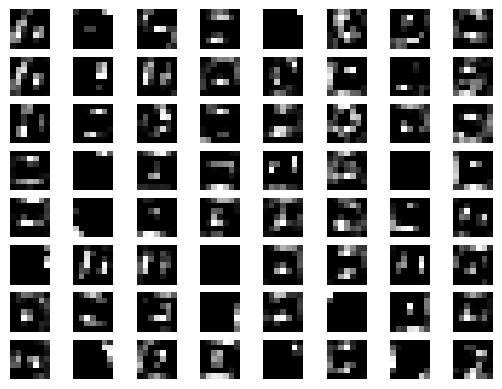

In [ ]:
from tensorflow.keras.models import Model

# Définition d'un modèle via la "graph" API de Keras
model_tmp = Model(model2.layers[0].input, model2.layers[4].output)

# Cartes réponses de x_test[10] (un '0')
feature_maps = model_tmp.predict(np.expand_dims(x_test[10], 0))

# normalisation des valeurs entre 0 et 1
minimum, maximum = np.min(feature_maps), np.max(feature_maps)
feature_maps = (feature_maps - minimum) / (maximum - minimum)

print(minimum, maximum, feature_maps.shape)

from PIL import Image
from IPython.display import display

images = []
for i in range(64):
  images.append(np.array(255*feature_maps[:,:,:,i]).reshape(7,7).astype('uint8'))

show_images(images, 8)

Les images obtenues semblent montrer que les filtres appris dans la première couche du réseau permettent la détection d'orientations ou des contours.



#### Visualisation des filtres

La visualisation des filtres de la couche d'entrée est relativement immédiate puisque que les filtres ont le même nombre de channels que les données d'entrée. Autrement dit, les filtres de la première couche sont définis sur le même domaine que les données.


In [ ]:
# Récupérer tous les paramètres appris par le réseau
weights = model2.get_weights()

for w in weights: print(w.shape)

(5, 5, 1, 64)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(1152, 512)
(512,)
(512, 128)
(128,)
(128, 10)
(10,)


<b>A faire : </b> A quoi correspondent chaque ligne issues de l'affichage de la cellule précédente ?

Affichons maintenant les filtres de la première couche de convolution :

-0.11737591 0.10898497


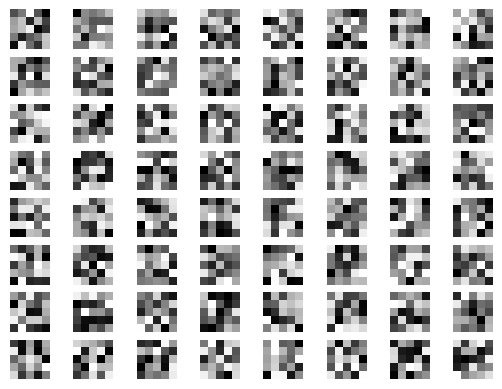

In [ ]:
# normalize values between 0 and 1
minimum, maximum = np.min(weights[0]), np.max(weights[0])
weights0 = (weights[0] - minimum) / (maximum - minimum)

print(minimum, maximum)
# entre 0 et 255 pour l'affichage
weights0 *= 255.

images = []
for i in range(64):
  images.append(np.array(255*weights0[:,:,:,i]).reshape(5,5).astype('uint8'))

show_images(images, 8)

### Entrainement d'un réseau très profond
*texte en italique*
Un réseau très profond tel que VGG contient énormément de paramètres, son entrainement peu s'avérer compliquer. Tous les paramètres doivent entrer en mémoire (RAM ou GPU), ainsi que toutes les données d'un minibatch. Dans le cas d'images relativement volumineuses (ie: Imagenet =255x255x3), la taille du minibatch est souvent ainsi très couteux en mémoire et se voit ainsi réduit à quelques images, rendant l'entrainement encore plus long...

Souvent, de grandes bases de données ne sont pas disponibles. Dans ce cas, pour parvenir à entrainer un tel réseau avec peu d'images, plusieurs options sont possibles :
- partir d'un réseau déjà (pré-)entrainé, et/ou utiliser ses poids pour initialiser un autre réseau qui sera appris sur une base (réduite) d'images (= finetuning, très efficace)
- régulariser les poids du réseau (peut aider mais ne suffit pas)
- augmenter artificiellement le nombre de données (améliore toujours les performances d'un réseau)

Dans la suite, nous illustrons ce dernier point sur les données MNIST.


In [ ]:

# Architecture du modèle
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(nb_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#print(model2.summary())

model2.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1)

score = model2.evaluate(x_test, y_test, verbose=0)
print("score=", score)

Epoch 1/20
469/469 [==============================] - 10s 9ms/step - loss: 0.1962 - accuracy: 0.9412
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0516 - accuracy: 0.9840
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0350 - accuracy: 0.9889
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0285 - accuracy: 0.9910
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0224 - accuracy: 0.9924
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0152 - accuracy: 0.9951
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0153 - accuracy: 0.9947
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0109 - accuracy: 0.996

La performance obtenue peut être améliorée en augmentant les données. La cellule suivante génère 20000 données à partir des 5000 utilisées jusque là.



(128, 28, 28, 1) (128, 10)


NameError: name 'num_classes' is not defined

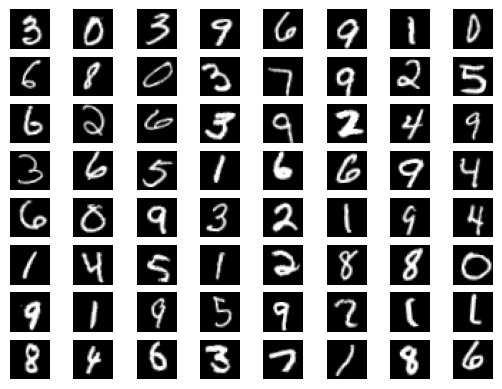

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# déclaration d'un générateur, qui transformera "à la volée" des données MNIST
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    zoom_range = 0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=False, # flip horizontal et vertical n'ont pas de sens pour des digits !
    vertical_flip=False
    )
datagen.fit(x_train)

# On instancie le générateur
flow = datagen.flow(x_train, y_train, batch_size=128, shuffle=True)

# Pour affichage : une itération du générateur
xx = next(flow)
print(xx[0].shape, xx[1].shape)

images = []
for i in range(64):
  images.append(np.array(255*xx[0][i,:,:,:]).reshape(28,28).astype('uint8'))
show_images(images, 8)


# réinitialisation du modèle
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# entrainement avec les données augmentées (à la volée)
model2.fit_generator(datagen.flow(x_train, y_train, batch_size=128), steps_per_epoch=int(20000/128), epochs=20)

# évaluation
score = model2.evaluate(x_test, y_test, verbose=0)
print("score=", score)

<b>A faire : </b> testez d'autres formes d'augmentation et d'autres quantités pour constater l'impact sur la précision du réseau.


<b>A faire : </b> modifiez l'architecture pour la classification d'images naturelles, en utilisant le jeu de données Cifar10.

## Experiences sur CIFAR

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np


### Chargement et Dimensionnement de la base CIFAR10

In [ ]:
from keras import backend as K
print(K.backend())

tensorflow


In [ ]:
from keras.datasets import cifar10

Réduction de la taille du dataset (pour accélérer l'apprentissage), et standardisation des données

In [ ]:
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()
print("Dimension de la base d'apprentissage CIFAR10 :",x_train_full.shape)
print("Dimension des vecteurs d'étiquette de classe :",y_train_full.shape)
print("Dimension de la base de test CIFAR10 :",x_test_full.shape)

170498071/170498071 [==============================] - 4s 0us/step
Dimension de la base d'apprentissage CIFAR10 : (50000, 32, 32, 3)
Dimension des vecteurs d'étiquette de classe : (50000, 1)
Dimension de la base de test CIFAR10 : (10000, 32, 32, 3)


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
n_training_samples = 5000
n_other_samples = 2000

def standardize(img_data):
    img_data_mean = np.mean(img_data, axis=(1,2), keepdims=True)
    img_data_std = np.std(img_data, axis=(1,2), keepdims=True)
    img_data = (img_data - img_data_mean) / img_data_std
    return img_data

train_ids = np.random.choice(len(x_train_full), size=n_training_samples, replace=False)
other_ids = np.random.choice(len(x_test_full), size=n_other_samples, replace=False)

n_valid = n_other_samples // 2
val_ids = other_ids[:n_valid]
test_ids = other_ids[n_valid:]

x_train_initial, y_train = x_train_full[train_ids], y_train_full[train_ids]
x_val_initial, y_val = x_test_full[val_ids], y_test_full[val_ids]
x_test_initial, y_test = x_test_full[test_ids], y_test_full[test_ids]

x_train = standardize(x_train_initial)
x_val = standardize(x_val_initial)
x_test = standardize(x_test_initial)

print("Dimension de notre base d'apprentissage :",x_train.shape)
print("Dimension des vecteurs d'étiquette de classe :",y_train.shape)
print("Dimension de notre base de validation :",x_val.shape)
print("Dimension de notre base de test :",x_test.shape)

Dimension de notre base d'apprentissage : (5000, 32, 32, 3)
Dimension des vecteurs d'étiquette de classe : (5000, 1)
Dimension de notre base de validation : (1000, 32, 32, 3)
Dimension de notre base de test : (1000, 32, 32, 3)


On affiche quelques images d'entraînement avec leur étiquette...

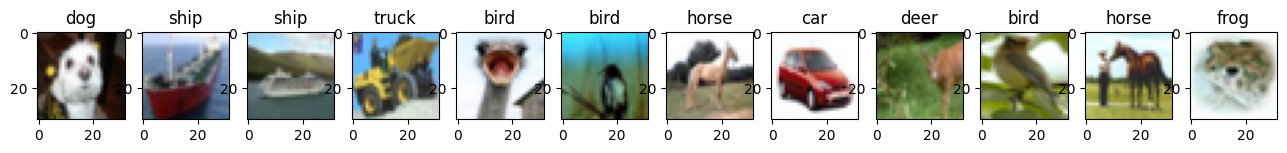

In [ ]:
n_display = 12
random_ids = np.random.choice(len(x_train), n_display, replace=False)
f, axarr = plt.subplots(1,n_display,figsize=(16,16))
for k in range(n_display):
    axarr[k].imshow(x_train_initial[random_ids[k]])
    axarr[k].title.set_text(classes[y_train[random_ids[k]][0]])

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print("Dimension des matrices d'étiquette de classe (train) :",y_train.shape)
print("Dimension des matrices d'étiquette de classe (val) :",y_val.shape)
print("Dimension des matrices d'étiquette de classe (test) :",y_test.shape)

### Definition de l'architecture du CNN

Un simple réseau convolutionnel...

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation
from keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters=8,
                kernel_size = (3, 3),
                activation = 'relu',
                padding = 'same',
                input_shape = (32, 32, 3),
                kernel_regularizer = l2(0.00)))
model.add(Dropout(0.0))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer = l2(0.00)))
model.add(Dropout(0.0))
model.add(Dense(10, activation='softmax', kernel_regularizer = l2(0.00)))
model.add(Dropout(0.0))

On enregistre les poids initiaux pour plus tard...

In [ ]:
weights_init = model.get_weights()

### Definition de la fonction de coût et choix de l'algorithme d'optimisation

In [ ]:
from keras.optimizers import Adam, SGD

opt = SGD(lr=0.01,momentum=0.0)
# opt = Adam(lr=0.001)
model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['acc'])

On affiche un résumé de la structure du modèle...

In [ ]:
print(model.summary())

### Entraînement du CNN

*Definition du callback. A passer en première lecture.*

In [ ]:
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint
import time

class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
filepath = "my_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=2)

callbacks = [time_callback, checkpoint]

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(x_val, y_val),
                    callbacks=callbacks)

Statistiques sur le temps d'entraînement d'une epoch

In [ ]:
times = time_callback.times
print("Mean: {}".format(np.mean(times)))
print("Std: {}".format(np.std(times)))

Tracé des courbes d'évolution des fonctions de coût

In [ ]:
history.history.keys()

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(history_dict['acc']) + 1)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.plot(epochs, loss_values, color='b', label='Training loss')
ax1.plot(epochs, val_loss_values, color='g', label='Validation loss')
ax1.tick_params(axis='y')
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Accuracy')  # we already handled the x-label with ax1
ax2.plot(epochs, acc_values, color='c', label='Training accuracy')
ax2.plot(epochs, val_acc_values, color='r', label='Validation accuracy')
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(loc=1)
plt.show()

### Entraînement d'un CNN avec points d'arrêt et reprises (à passer en première lecture)

Pour des entraînements plus conséquents, il est primordial d'enregistrer les modèles intermédiaires afin de ne pas tout perdre si l'apprentissage venait à s'interrompre de façon impromptue. On peut enregistrer le modèle dans un fichier .hdf

Si vous regardez plus attentivement, lors de l'entrainement précédent nous avons crée un object **ModelCheckpoint**. Il permet d'enregistrer le meilleur modèle (au sens d'une metrique à préciser) dans un fichier nommé *my_model.h5*. Verifiez que ce fichier se trouve bien votre espace de travail.

L'argument ***period*** de l'objet ModelCheckpoint vous permet de definir la fréquence des enregistrements.

In [ ]:
from keras.models import load_model

Une fois le modele obtenu, on peut l'enregister et le recharger comme ceci: load_model(filepath)

In [ ]:
from keras.models import load_model

import pathlib
file = pathlib.Path(filepath)
if file.exists():
    model = load_model(filepath)
else:
    model.set_weights(weights_init)
    callbacks = [time_callback,checkpoint]
history_2 = model.fit(x_train, y_train, batch_size=8, epochs=10, verbose=1, validation_data=(x_val, y_val),
                      callbacks = callbacks)

### Test et Évaluation du modèle en prédiction

#### Test du modèle sur les données de test

Testons la prédiction de notre modèle sur quelques images de test au hasard...

In [ ]:
random_ids = np.random.choice(len(x_test), n_display, replace=False)
pred = np.argmax(model.predict(x_test[random_ids]), axis=1)
f, axarr = plt.subplots(1,n_display,figsize=(16,16))
for k in range(n_display):
    axarr[k].imshow(x_test_initial[random_ids[k]])
    axarr[k].title.set_text(classes[pred[k]])

Vos premiers résultats semblent-ils corrects ?

Hum ! Affichons à présent la précision sur l'ensemble de votre base :

In [ ]:
print("Précision du réseau sur les {} images d'entraînement : {:.2f} %".format(n_training_samples, 100 * history_dict['acc'][-1]))
print("Précision du réseau sur les {} images de validation : {:.2f} %".format(n_valid, 100 * history_dict['val_acc'][-1]))

In [ ]:
def accuracy_per_class(model):
    n_classes = len(classes)
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.int64)

    pred = np.argmax(model.predict(x_test), axis=1)
    for i in range(len(y_test)):
        confusion_matrix[np.argmax(y_test[i]), pred[i]] += 1

    print("{:<10} {:^10}".format("Classe", "Précision (%)"))
    total_correct = 0
    for i in range(n_classes):
        class_total = confusion_matrix[i, :].sum()
        class_correct = confusion_matrix[i, i]
        total_correct += class_correct
        percentage_correct = 100.0 * float(class_correct) / class_total
        print('{:<10} {:^10.2f}'.format(classes[i], percentage_correct))
    test_acc = 100.0 * float(total_correct) / len(y_test)
    print("Précision du réseau sur les {} images de test : {:.2f} %".format(len(y_test),test_acc))
    return confusion_matrix

confusion_matrix = accuracy_per_class(model)

#### Matrices de Confusion

Les matrices de confusion nous renseignent plus précisément sur la nature des erreurs commises par notre modèle.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matrice de confusion',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    :param cm: (numpy matrix) confusion matrix
    :param classes: [str]
    :param normalize: (bool)
    :param title: (str)
    :param cmap: (matplotlib color map)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Vérité Terrain')
    plt.xlabel('Prédiction')

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes, normalize=True,
                      title='Matrice de confusion normalisée')

# Plot non-normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes,
                      title='Matrice de confusion non normalisée')